In [115]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Filenames have a certain structure:

000001-09eada874fc784a668315070-6-400-9400.jpg

extraction_index-match_hash-minute-frame_shift-frame_idx, where:

    extraction_index: index of the extracted frame in a sequence, just for sorting purposes, some indices can exist multiple times
    match_hash: hashed match name
    minute: minute of the match, from which the frame comes
    frame_shift: during extraction, random frame shift (by number of frames equal to  frame_shift) is applied to increase diversity
    frame_idx: global frame index from a video

# data exploration

In [110]:
df_train = pd.DataFrame([])
df_test = pd.DataFrame([])

counts = {'pos': 0,
          'neg': 0}
test_name = 'FrameFilter-test_set'
for folder in os.listdir('data'):
    
    sub = os.path.join('data', folder)
    
    if folder !=test_name:
        for s in os.listdir(sub):
            
            sub_parts = os.path.join(sub, s)
            l = len(os.listdir(sub_parts))
            counts[s]+=l
            
            tmp  = pd.DataFrame({'root': [sub_parts for i in range(l)],
                                 'name': os.listdir(sub_parts),
                                 'frame': ['pos' for i in range(l)]})
            df_train = df_train.append(tmp, ignore_index=True)
            
test_paths = os.listdir(os.path.join('data', test_name))
df_test = df_test.append(pd.DataFrame({"path": test_paths}))

print("Training: {}".format(counts))
print("Test: {}".format(len(test_paths)))

Training: {'pos': 1643, 'neg': 1335}
Test: 600


In [111]:
df_train.shape, df_test.shape 

((2978, 3), (600, 1))

## splitting to see more insights on particular frame data info

In [112]:
df_train[['extraction_index', 
        'match_hash',
        'minute',
        'frame_shift',
        'frame_idx']] = df_train['name'].str.split('-',expand=True)
df_train[['frame_idx', 'format']] = df_train['name'].str.split('.', expand=True)

In [126]:
df_train[['extraction_index', 'minute','frame_shift']] = df_train[['extraction_index', 'minute','frame_shift']].astype(np.int)

### exploring data to see how to split the dataset into training and validation
* both of these should roughly include the same proportion of minute ranges, and other similarities

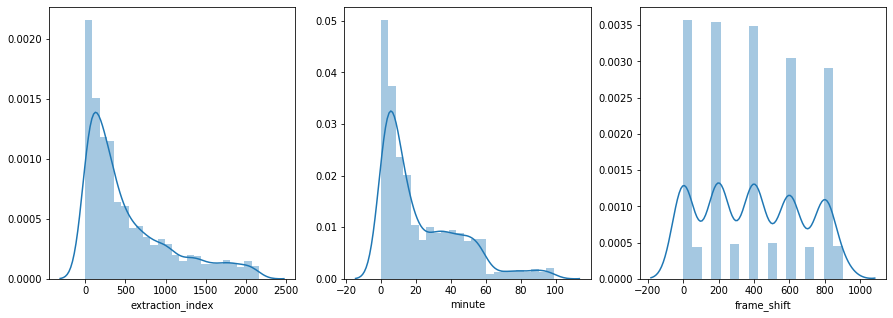

In [130]:
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.distplot(df_train.extraction_index)
plt.subplot(132)
sns.distplot(df_train.minute)
plt.subplot(133)
sns.distplot(df_train.frame_shift)

# displot analysis
 * first thing I have noticed is that we have a lot of frames at the start of the match, and very few towards the end. This has to be balanced out when splitting into traina and validation sets
 * 